# Tidy Data Project: *2008 Olympic Medalists*
Welcome to my Jupyter Notebook! In this notebook, I will be using an adapted version of the [2008 Olympics Medalists](https://edjnet.github.io/OlympicsGoNUTS/2008/) dataset to introduce some tidydata principles in cleaning messay data and to show exactly how such principles provided the means through which interpretations/visualizations were formed. To use this notebook, download the *olympics_08_medalists.csv* file off my [Github](https://github.com/roccoperi/PERI-Data-Science-Portfolio/tree/main/TidyData-Project/data) and ensure that the csv file is in the correct working directory. 

## What is the purpose of Tidy Data?
I would say that initially, any bulk data that you download/create for yourself is not in the proper format/has a lot of missing values, and as a result of such, working with the data becomes increasingly difficult. However, data manpulation with [Tidy Data Principles](https://vita.had.co.nz/papers/tidy-data.pdf) allows the data to be in a format that can provide useful for data interpretation. In my case, as seen shortly below, the initial data set has a lot of missing values which makes it very difficult to extract information from. 

# Step 1: Loading the relevant packages + importing the untidy 2008 Olympics Medalist data set. 

In [182]:
#Loading all relevant packages 
import pandas as pd # For Data Handling
import matplotlib.pyplot as plt # For graph creation/visualizations
import seaborn as sns # Another package for visualizations

#Importing the 2008 Olympic medalists data
df = pd.read_csv("C:data\olympics_08_medalists.csv")

#First 5 rows of the dataset
print(df.head())


       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN               NaN  ...            

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
C:\Users\rocco\AppData\Local\Temp\ipykernel_11564\2966005895.py:7: SyntaxWarning: invalid escape sequence '\o'
  df = pd.read_csv("C:data\olympics_08_medalists.csv")



# Step 2: Data Wrangling & Cleaning

## Current Issues with the dataset
As seen above, per the 5 Olympic Atheletes, there is a lot of missing values. This intuitively makes sense. Unless an athelete achieved a medal in multiple events, if they are in this dataset, they have 1 medal (bronze, silver, or gold) associated with them out of the 71 events represented. Thus, for each of the 1875 atheletes in this dataset, there is going to be a lot of missing values for each of them. Furthermore, the events (column headers) are not categories, but rather a value associated with the category of event, which makes this dataset very messy to deal with. With these two important issues from the dataset, working with it as is might not be the smartest/cleanest way to draw interpretations. 

## How I cleaned this dataset
However, we can rely on [Pandas](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) functions and other python functions to manipulate our data such that the missing values will go away and the data is organized according to tidy data principles. One function that I used is pd_melt(), which organizes the data such that for each athelete, there is the medal associated with them or not for all 70 sports. From this, we can use the drop.na() function to delete all the rows that do not have a medal, only leaving the athelete, the sport they got the medal in, and the type of medal they got. Finally, I cleaned the names of the table such that the underscores were deleted, proper capitalization is put into place, and the medalist_name column changed to "Athelete." The result of this data wrangling is below. 

In [183]:

# Using pd melt to organize the data in a way where each variable is in its own column, 
# each observation is in its own row, and each observational unit forming its own table
df_melted = pd.melt(df, id_vars=['medalist_name'],
                    value_vars=['male_archery', 'female_archery', 'male_athletics',	'female_athletics',	'male_badminton',	'female_badminton',	'male_baseball',
                                   	'male_basketball',	'female_basketball',	'male_boxing',	'male_canoeing and kayaking', 'female_canoeing and kayaking',	'male_road bicycle racing',	'female_road bicycle racing',	'male_track cycling',	
                                    'female_track cycling',	'male_mountain biking',	'female_mountain biking',	'male_bmx',	'female_bmx',	'male_diving',	'female_diving',
                                    'female_equestrian sport',	'male_equestrian sport',	'male_fencing',	'female_fencing',	'male_field hockey',	'female_field hockey',	'male_association football',	
                                    'female_association football',	'male_artistic gymnastics', 'female_artistic gymnastics',	'female_rhythmic gymnastics',	'male_trampoline gymnastics',	'female_trampoline gymnastics',	'male_handball',
                                    'female_handball',	'male_judo',	'female_judo',	'male_modern pentathlon',	'female_modern pentathlon',	'male_rowing',
                                    'female_rowing',	'male_sailing',	'female_sailing',	'male_shooting sport',	'female_shooting sport',	'female_softball',	'male_swimming',
                                    'female_swimming',	'female_synchronized swimming',	'male_table tennis',	'female_table tennis',	'male_taekwondo',
                                    'female_taekwondo',	'male_tennis',	'female_tennis',	'male_triathlon',	'female_triathlon',	'male_beach volleyball',
                                    'female_beach volleyball',	'male_volleyball',	'female_volleyball',	'male_water polo',	'female_water polo', 'male_weightlifting',
                                    'female_weightlifting',	'male_freestyle wrestling',	'female_freestyle wrestling',	'male_greco-roman wrestling'],
                    var_name='Event', value_name='Medal')

# Dropping all the observations that do not contain a medal
df_clean = df_melted.dropna()

#Cleaning the medalist_name column name
df_clean = df_clean.rename(columns = {"medalist_name" : "Athelete"})

#Cleaning the sport names
df_clean["Event"] = df_clean["Event"].str.replace("_", " ").str.title()

# Exporting the cleaned data set for my github repository
df_clean.to_csv('data\cleaned_olympic.csv')

#Displaying the Data
df_clean


<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
C:\Users\rocco\AppData\Local\Temp\ipykernel_11564\3531629123.py:27: SyntaxWarning: invalid escape sequence '\c'
  df_clean.to_csv('data\cleaned_olympic.csv')


,Athelete,Event,Medal
177,Bair Badënov,Male Archery,bronze
676,Ilario Di Buò,Male Archery,silver
682,Im Dong-hyun,Male Archery,gold
760,Jiang Lin,Male Archery,bronze
920,Lee Chang-hwan,Male Archery,gold
...,...,...,...
130932,Steeve Guénot,Male Greco-Roman Wrestling,gold
131159,Yannick Szczepaniak,Male Greco-Roman Wrestling,bronze
131162,Yavor Yanakiev,Male Greco-Roman Wrestling,bronze
131200,Yury Patrikeyev,Male Greco-Roman Wrestling,bronze


# Step 3: Aggregation + Pivot Table

What I am interested it from this dataset on the 2008 Olympic Medalists is the distribution of medals across the sports, quantifying and visualizing how some sports have a larger medal count than others. Therefore, I must wrangle my data more such that I can properly draw insight towards what I am interested in. In order to do so, I created a pivot table utilizing the cleaned data above with the event as the rows and the different medals as the columns, and in each observation, there is displayed the the number of medals obtained in that event categorized by medal type using the "size" aggregation function. The pivot table I created is below. 

In [184]:
# Aggregation/Pivot Table 

df_clean_pivot_arg = df_clean.pivot_table(index = 'Event', columns = 'Medal', aggfunc = 'size', fill_value = 0)
df_clean_pivot_arg = df_clean_pivot_arg.rename(columns = {"bronze" : "Bronze", "silver" : "Silver", "gold" : "Gold"})


# Displaying the Data 
df_clean_pivot_arg

Medal,Bronze,Gold,Silver
Event,,,
Female Archery,4,2,3
Female Artistic Gymnastics,7,7,6
Female Association Football,18,18,18
Female Athletics,26,27,28
Female Badminton,3,3,4
...,...,...,...
Male Trampoline Gymnastics,1,1,1
Male Triathlon,1,1,1
Male Volleyball,12,12,12


# Step 4: Visualizations
With the pivot table created, I can now create a visualization that can effectivly provide insights into what Olympic Events have higher or lower total medal counts. I believe that the two visualizations that can help me the most in this regard are bar charts and histograms. 

## Bar Chart
Below is the code that I used to create a bar chart, plotting the total medal count of each event, categorized by medal type, in mostly ascending order. Because I did not want to have the bar graph only display the total medal count without the distinction of medal types, I used the sort.values function on the **bronze** category of the medal type, resulting in the broadly ascending trend in the bar chart with a some of error. 

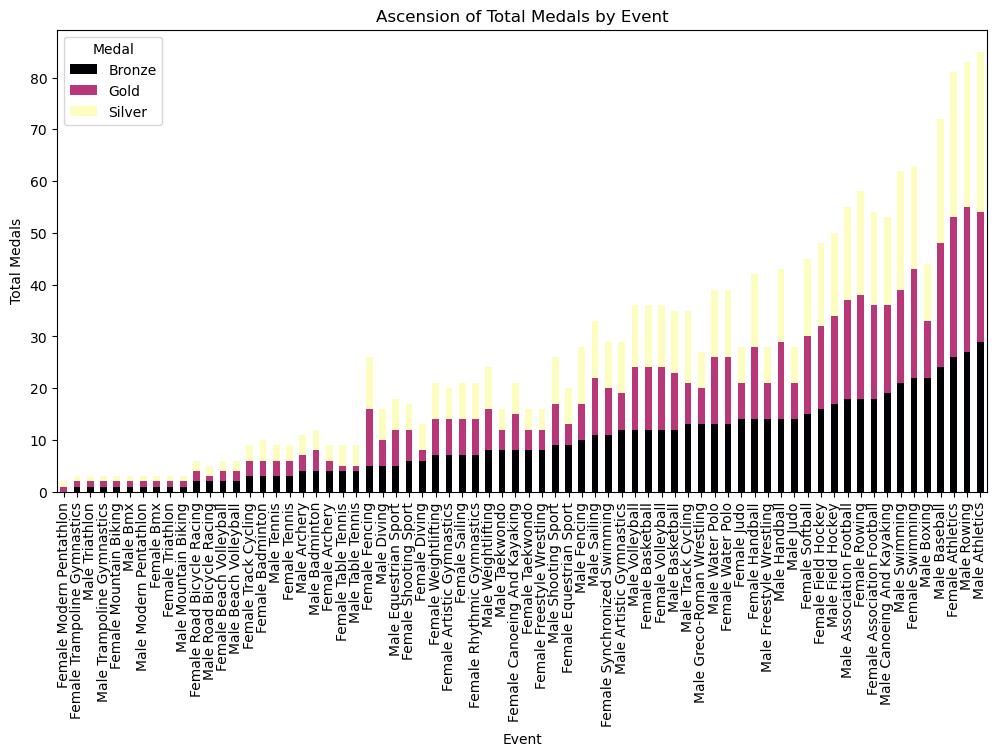

In [185]:
#Bar Graph Visualization 

df_clean_pivot_asc = df_clean_pivot_arg.sort_values("Bronze", ascending = True)
df_clean_pivot_asc.plot(kind="bar", stacked=True, figsize=(12,6), colormap="magma")
plt.ylabel("Total Medals")
plt.title("Ascension of Total Medals by Event")
plt.show()

As seen in this bar chart, it is clear what categories of events have more medals. For example, events like Male Athletics and Female Athletics, covering a large variety of track and field sports, is going to contain a large amount of medals due to the volume of events in this category, resulting in the two of the three highest medal totals. Additionally, team sports such as Male Baseball and Female Softball are events in which there are a lot of players each team represented, and thus the winning team in the bronze, silver, and gold categories are going to receive a medal for each player, resulting in the high medal count. On the other hand, single person winner sports such as Female Mountain Biking, Female Triathlon, and Male Bmx are going to have only three winners, one for each medal type, resulting in the small total medal count. What I am very surprised in is the two total medal count for Female Modern Pentathlon, as it shows that some datasets might have missing data prior to any data wrangling or data cleaning. Additionally, I personally never knew that Female Fencing had so many players to warrant the somewhat high total medal count. Thus, this visualization provided some perspective into the nature of handling data and also piqued my curiosity to a very high degree. This bar chart shows medal count by each individual event. However, if we want to look at the distributions of medals more generally, a histogram might provide more insight into the types of events that occur at the Olympics. 

# Histogram
Below is the code I used to create a histogram detailing the distribution of total medals over all of the events. I first used the .sum function create the column "Total" indicating the total medals per event, and then I created a histogram using this "Total."  The results of my code and thus the histogram is shown below. 

<>:15: SyntaxWarning: invalid escape sequence '\o'
<>:15: SyntaxWarning: invalid escape sequence '\o'
C:\Users\rocco\AppData\Local\Temp\ipykernel_11564\2216495270.py:15: SyntaxWarning: invalid escape sequence '\o'
  df_clean_pivot_arg.to_csv('data\olympic_pivot.csv')


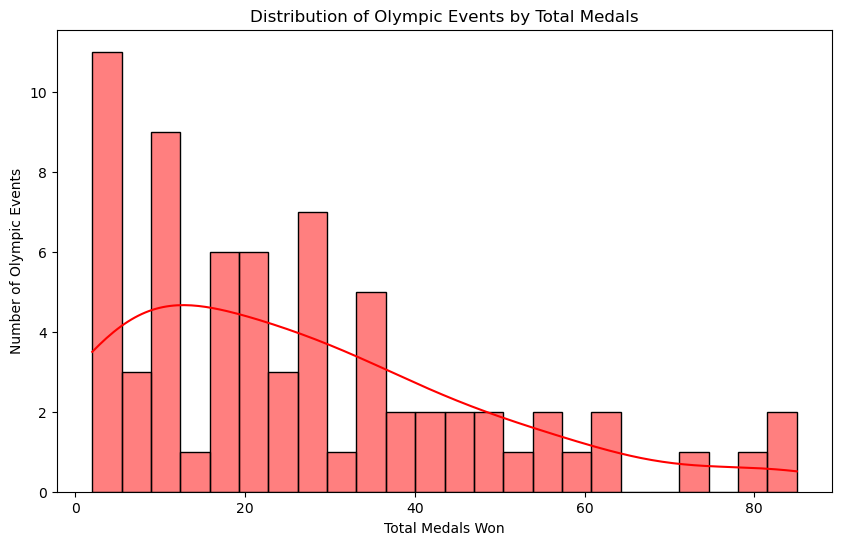

In [186]:
#Histogram Visualization
df_clean_pivot_arg["Total"] = df_clean_pivot_arg.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(df_clean_pivot_arg["Total"], bins=24, kde=True, color="red")

# Titles and labels
plt.title("Distribution of Olympic Events by Total Medals")
plt.xlabel("Total Medals Won")
plt.ylabel("Number of Olympic Events")

plt.show()

## Exporting the cleaned data set for my github repository
df_clean_pivot_arg.to_csv('data\olympic_pivot.csv')

From this histogram, with about 6 bins per interval below, it is apparent that the distribution of events by total medals win is heavily skewed to the right, meaning that less events have high amounts of total medals. Furthermore, there seems to be a gradual trend downward in the histogram, loosely indicating that as the total number of medals increases, the number of events that harbor that many medals decreases with the reverse relationship occuring as the total number of medals won decreases. Therefore, it is apparent from this histogram that a large number of Olympic events are centered around individual/small group performance from the countries and less focused around building a  event schedule around very large group events. This is not to say that the larger group events are more or less popular to the viewers, but the higher quantity of events with less total medals indicates that the Olympics makes it a priority to focus on these smaller group forms of athletic achievement. 

# Conclusion

I hope you enjoyed looking through this Jupyter Notebook! A general overview of this notebook can be found on my [Github](https://github.com/roccoperi/PERI-Data-Science-Portfolio/tree/main/TidyData-Project). Through this process, I learned a tremendous amount about visualizations and data wrangling, and I hope I can translate this acquired knowledge into my future data science projects in this course. 